In [135]:
import pandas as pd
import numpy as np
from random import randrange
import json
import matplotlib.pyplot as plt
%matplotlib inline 

In [79]:
def json_keys_to_csv_string(json_obj, delimiter):
    csv_line=''
    for key in json_obj.keys():
        csv_line+=key
        csv_line+=delimiter
    csv_line=csv_line[:-len(delimiter)]
    return csv_line

def json_values_to_csv_string(json_obj, col_names, delimiter):
    csv_line=''
    for key in col_names:
        csv_line+=str(json_obj.get(key))
        csv_line+=delimiter
    csv_line=csv_line[:-len(delimiter)]
    return csv_line


def json_to_csv(input_file_name, output_file_name, delimiter):
    col_names = None;
    with open(input_file_name, 'r') as istr:
        with open(output_file_name, 'w') as ostr:
            for i, line in enumerate(istr):
                # Get rid of the trailing newline (if any).
                line = line.rstrip('\n')
                csv_line = None
                
                json_obj = json.loads(line)
                
                #load headers
                if col_names is None:
                    col_names = json_obj.keys()
                    csv_line = json_keys_to_csv_string(json_obj, delimiter)
                    print(csv_line, file=ostr)
                
                #load values
                csv_line = None
                csv_line = json_values_to_csv_string(json_obj, col_names, delimiter)
                print(csv_line, file=ostr)

In [87]:
def sample_csv(input_file_name, output_file_name, sample_size, total_size):
    random_indexes = set()
    while(len(random_indexes)!=sample_size):
        random_indexes.add(randrange(1,total_size+1))
        
    with open(input_file_name, 'r') as istr:
        with open(output_file_name, 'w') as ostr:
            for i, line in enumerate(istr):
                if (i in random_indexes) or (i==0):
                    line = line.rstrip('\n')
                    print(line, file=ostr)

In [92]:
def csv_to_df(input_file_name, delimiter):
    return pd.read_csv(input_file_name, delimiter=delimiter)

In [81]:
input_file_name = '/Users/rohitjoshi/thinkful/data-science-prep/reviews_Movies_and_TV_5.json'
output_file_name = '/Users/rohitjoshi/thinkful/data-science-prep/reviews_Movies_and_TV_5.csv'
#json_to_csv(input_file_name,output_file_name, '@--@')

In [90]:
input_file_name = '/Users/rohitjoshi/thinkful/data-science-prep/reviews_Movies_and_TV_5.csv'
output_file_name = '/Users/rohitjoshi/thinkful/data-science-prep/reviews_Movies_and_TV_5_sample.csv'
#sample_csv(input_file_name,output_file_name, 10000, 1500000)

In [93]:
input_file_name = '/Users/rohitjoshi/thinkful/data-science-prep/reviews_Movies_and_TV_5_sample.csv'
df = csv_to_df(input_file_name, '@--@')

/Users/rohitjoshi/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


In [130]:
df.ix[:1,:]

,asin,unixReviewTime,reviewText,overall,helpful,reviewerName,reviewerID,summary,reviewTime
0,0307142469,976320000,This delightful 1969 animation based on the po...,4.0,"[9, 11]","""flickjunkie""",A3CWH6VKCTJAD,A Christmas classic,"12 9, 2000"
1,0307142485,1097366400,If you love the Rankin-Bass version of this cl...,1.0,"[35, 40]",L. M Young,A2NLIB986TEESZ,Not The Aaron I Remember,"10 10, 2004"


In [131]:
df.ix[:10,3:4]

,overall
0,4.0
1,1.0
2,5.0
3,1.0
4,5.0
5,5.0
6,4.0
7,1.0
8,5.0
9,5.0


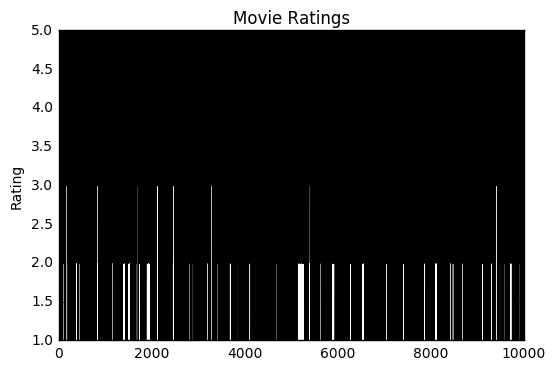

In [111]:
plt.plot(df.ix[:,3:4], color = "black")
plt.ylabel('Rating')
plt.title('Movie Ratings')


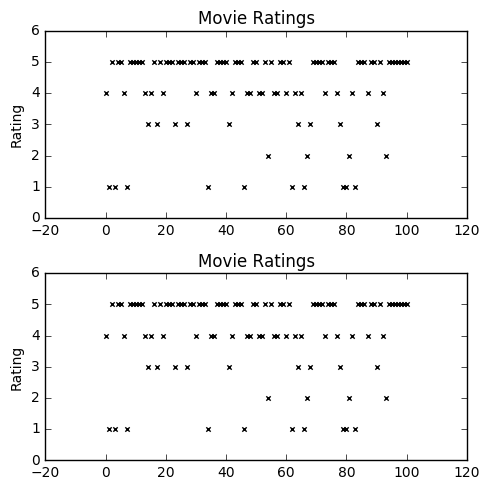

In [152]:
plt.figure(figsize=(5,5))
plt.subplot(2, 1, 1)
plt.scatter(x=np.arange(num_of_rows+1), y=df.ix[:num_of_rows,3:4], color = "black", marker = 'x', s = 10)
plt.ylabel('Rating')
plt.title('Movie Ratings')

plt.subplot(2, 1, 2)
plt.scatter(x=np.arange(num_of_rows+1), y=df.ix[:num_of_rows,3:4], color = "black", marker = 'x', s = 10)
plt.ylabel('Rating')
plt.title('Movie Ratings')

plt.tight_layout()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x127e8ba90>]], dtype=object)

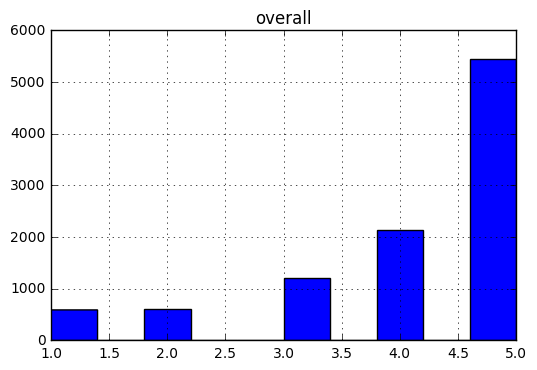

In [169]:
df.ix[:,3:4].hist()